# SentinelNet – Dataset Acquisition & Exploratory Data Analysis

## Objective
- Download NSL-KDD dataset
- Load and inspect dataset
- Perform structural and statistical analysis
- Analyze class imbalance
- Explore key features

In [14]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [15]:
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

URLS = {
    'KDDTrain+.txt': 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt',
    'KDDTest+.txt': 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt'
}

def download_file(url, filename):
    filepath = os.path.join(DATA_DIR, filename)
    if not os.path.exists(filepath):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filepath, 'wb') as f:
            f.write(response.content)
        print("Download complete.")
    else:
        print(f"{filename} already exists.")
    return filepath

train_path = download_file(URLS['KDDTrain+.txt'], 'KDDTrain+.txt')
test_path = download_file(URLS['KDDTest+.txt'], 'KDDTest+.txt')


KDDTrain+.txt already exists.
KDDTest+.txt already exists.


In [16]:
COLUMNS = [
'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
'dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate',
'dst_host_rerror_rate','dst_host_srv_rerror_rate',
'class','difficulty'
]

In [17]:
train_df = pd.read_csv(train_path, names=COLUMNS)
test_df = pd.read_csv(test_path, names=COLUMNS)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (125973, 43)
Test shape: (22544, 43)


In [18]:
train_df.head()
train_df.info()
train_df.describe()

train_df.isnull().sum().sum()

<class 'pandas.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  str    
 2   service                      125973 non-null  str    
 3   flag                         125973 non-null  str    
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root_shell

np.int64(0)

In [19]:
train_df.duplicated().sum()
train_df = train_df.drop_duplicates()

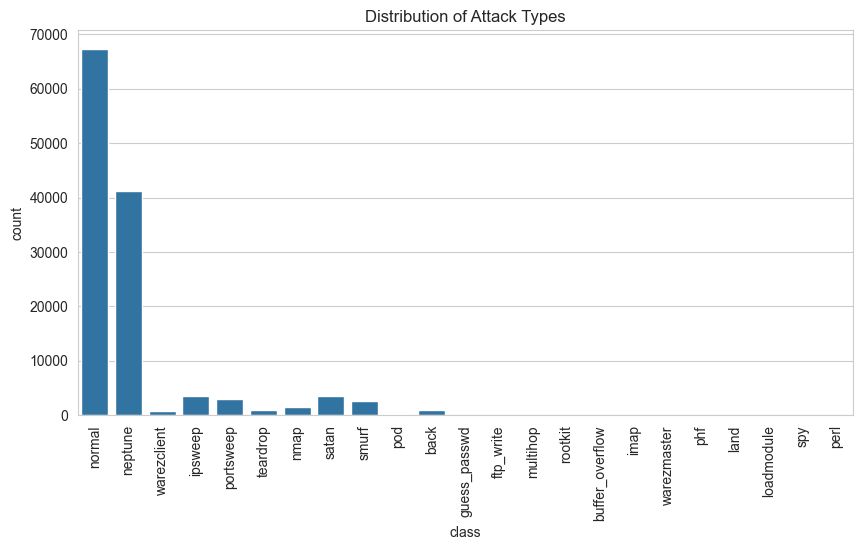

In [20]:
train_df['class'].value_counts()

(train_df['class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='class')
plt.xticks(rotation=90)
plt.title("Distribution of Attack Types")
plt.show()

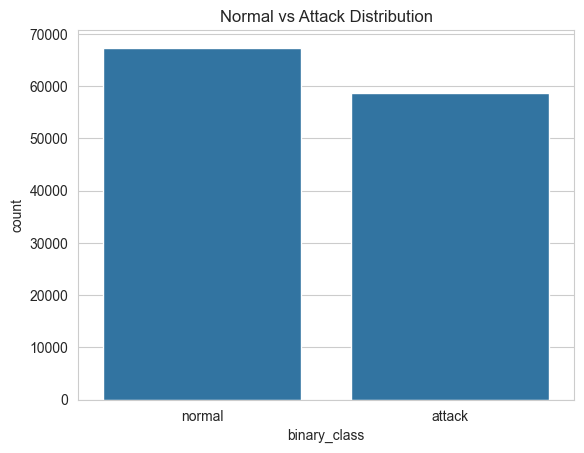

In [21]:
train_df['binary_class'] = train_df['class'].apply(
    lambda x: 'normal' if x == 'normal' else 'attack'
)

train_df['binary_class'].value_counts()

sns.countplot(data=train_df, x='binary_class')
plt.title("Normal vs Attack Distribution")
plt.show()

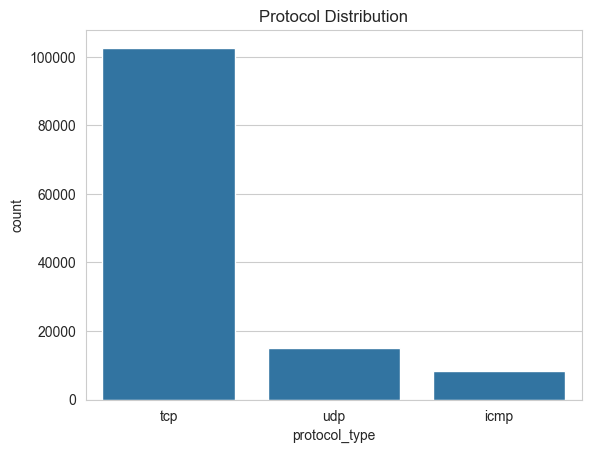

In [22]:
train_df['protocol_type'].value_counts()

sns.countplot(data=train_df, x='protocol_type')
plt.title("Protocol Distribution")
plt.show()

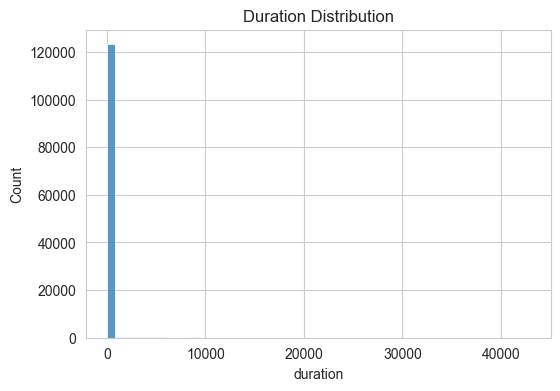

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(train_df['duration'], bins=50)
plt.title("Duration Distribution")
plt.show()

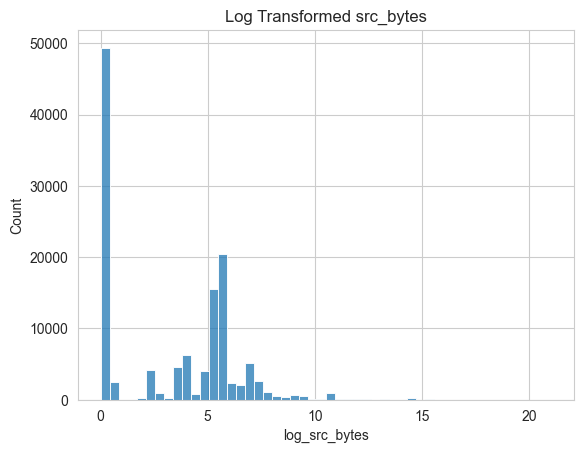

In [24]:
train_df['log_src_bytes'] = np.log1p(train_df['src_bytes'])

sns.histplot(train_df['log_src_bytes'], bins=50)
plt.title("Log Transformed src_bytes")
plt.show()

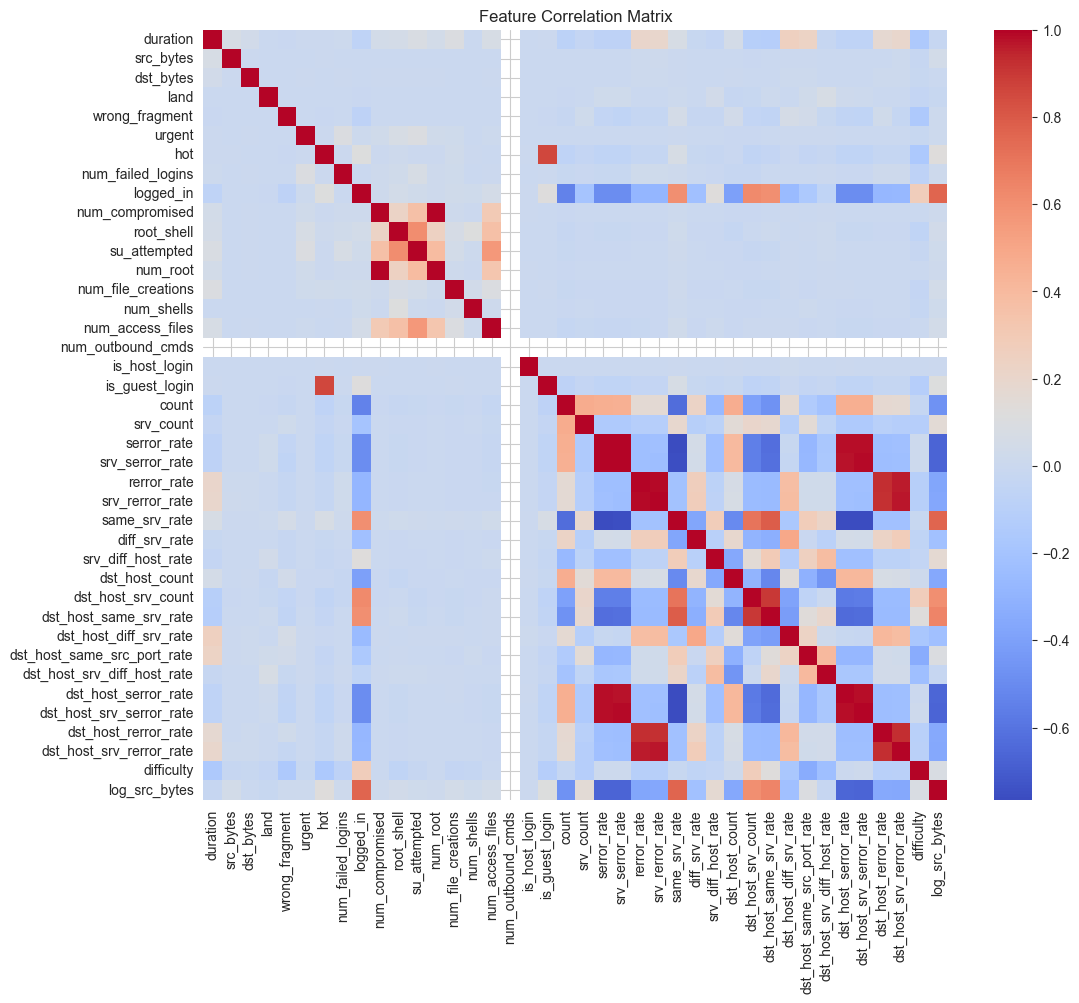

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## Key Findings

1. Dataset contains X samples and Y features.
2. No missing values detected.
3. Dataset shows class imbalance.
4. TCP protocol dominates traffic.
5. Some numerical features are highly skewed.

This completes Week 1 dataset exploration.